In [1]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=2c23de8bb4e090598ccea4dda7ef8a47cd8fcbcaf1b9c838ad8b31982fdbcb98
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

In [3]:
df_train = pd.read_excel("//kaggle/input/emonoba-cadc/emonoba_train_clean.xlsx")

In [4]:
df_train.head()

,Data,Love,Joy,Surprise,Anger,Sadness,Fear
0,লকাল বাস ভালো এটা থেকে,0,0,0,0,1,0
1,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ...,0,0,0,0,1,0
2,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬...,0,0,0,1,0,0
3,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,0,0,0,0,1,0
4,সত্যিকার মানুষ তারাই ভাই,0,1,0,0,0,0


In [5]:
# Function to get the emotion with value 1 or NaN if all values are 0
def get_emotion(row):
    emotions = ['Love', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear']
    nonzero_emotions = [emotion for emotion in emotions if row[emotion] == 1]
    return nonzero_emotions[0] if nonzero_emotions else np.nan

# Create a new column 'Emotion' based on the custom function
df_train['Label'] = df_train.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_train = df_train[['Data', 'Label']]

In [6]:
df_train

,Data,Label
0,লকাল বাস ভালো এটা থেকে,Sadness
1,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ...,Sadness
2,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬...,Anger
3,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,Sadness
4,সত্যিকার মানুষ তারাই ভাই,Joy
...,...,...
18415,সমস্যা নাই কি আমরা একদিন ক্রিকেট কে শাসন করবে...,Joy
18416,খানকিরপুলা তার মাকে গিয়ে বলে তর মাকে মনটা গিয়ে।,Sadness
18417,ভাই চেয়ার কই🙄,Surprise
18418,সবকয়টা তো একই গোয়ালের গাই,Sadness


In [7]:
df_train.dropna(inplace=True)

In [8]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

1254


In [9]:
df_train['Label'].value_counts()

Label
Joy         6478
Sadness     3975
Love        3786
Anger       3295
Surprise     724
Fear         162
Name: count, dtype: int64

In [10]:
df_val = pd.read_excel("/kaggle/input/emonoba-cadc/emonoba_val_clean.xlsx")

In [11]:
df_val

,Data,Love,Joy,Surprise,Anger,Sadness,Fear
0,চট্টগ্রাম এবং কক্সবাজার বন্যা কবলিত চট্রগ্রাম ...,0,1,0,0,0,0
1,আমার কাছে ছিল শুধু ত্রান ফটো সামগ্রী। বছর দুয়...,0,0,0,1,0,0
2,হারিয়ে দেখিয়ে দিল মাদ্রাসা ছাত্র,0,1,0,0,0,0
3,তোরা না সাবিহা দল হারিয়ে দেখিয়ে দেশ। 😡😡😡,0,0,0,0,1,0
4,বিপ্লবী সাহসী মেয়ে ...,0,1,0,0,0,0
...,...,...,...,...,...,...,...
2042,অনেক অনেক ভাল লাগলো,0,1,0,0,0,0
2043,একটু সাউন্ড এর সমস্যা,0,0,0,1,0,0
2044,খেলা হব্বে 💕,0,1,0,0,0,0
2045,মুখে আর বয়ান শুনতে চায় না এর বিচার ফাঁসি চায়,0,0,0,0,1,0


In [12]:
# Create a new column 'Emotion' based on the custom function
df_val['Label'] = df_val.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_val = df_val[['Data', 'Label']]

In [13]:
df_val

,Data,Label
0,চট্টগ্রাম এবং কক্সবাজার বন্যা কবলিত চট্রগ্রাম ...,Joy
1,আমার কাছে ছিল শুধু ত্রান ফটো সামগ্রী। বছর দুয়...,Anger
2,হারিয়ে দেখিয়ে দিল মাদ্রাসা ছাত্র,Joy
3,তোরা না সাবিহা দল হারিয়ে দেখিয়ে দেশ। 😡😡😡,Sadness
4,বিপ্লবী সাহসী মেয়ে ...,Joy
...,...,...
2042,অনেক অনেক ভাল লাগলো,Joy
2043,একটু সাউন্ড এর সমস্যা,Anger
2044,খেলা হব্বে 💕,Joy
2045,মুখে আর বয়ান শুনতে চায় না এর বিচার ফাঁসি চায়,Sadness


In [14]:
df_val.dropna(inplace=True)

In [15]:
df_val['Label'].value_counts()

Label
Joy         743
Sadness     429
Love        414
Anger       362
Surprise     79
Fear         20
Name: count, dtype: int64

In [16]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

In [17]:
df_train['Data'] = df_train['Data'].apply(clean_text)
df_val['Data'] = df_val['Data'].apply(clean_text)

In [18]:
df_train["Label"].value_counts()

Label
Joy         6478
Sadness     3975
Love        3786
Anger       3295
Surprise     724
Fear         162
Name: count, dtype: int64

In [19]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(df_train['Data'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00004 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
____                                         0.000021
_________________________________________    0.000028
____স                                        0.000022
___জ                                         0.000031
___ত                                         0.000030
                                               ...   
৯৫                                           0.000014
ৱণ                                           0.000032
৷অ                                           0.000022
৷স                                           0.000020
৷৷৷ভ                                         0.000020
Length: 932, dtype: float64


In [20]:
# Function to remove less important words
def remove_less_important_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)



In [21]:
df_train['Data'] = df_train['Data'].apply(remove_less_important_words)
df_val['Data'] = df_val['Data'].apply(remove_less_important_words)

In [22]:
# from sklearn.model_selection import train_test_split

# train_df, test_df = train_test_split(, test_size=0.2,stratify=df['classes'],random_state=42)


In [23]:
X_train  =  df_train['Data'].values.tolist()
y_train = df_train['Label'].tolist()

In [24]:
X_test =  df_val['Data'].values.tolist()
y_test = df_val['Label'].tolist()

In [25]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 61.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 11.7 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=41628f0d298f24098d391c4188ef1a90d79cb8974ca2f69f74cdf139c7162b68
  Stored in directory: /roo

In [26]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [27]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 11
	95percentile : 27
	99percentile : 47


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 11
	95percentile : 29
	99percentile : 53


In [28]:
print(trn)

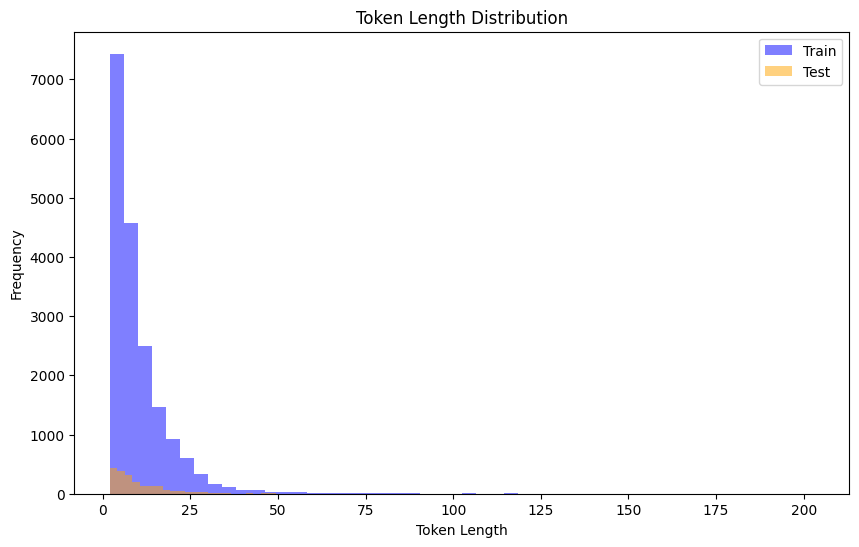

In [29]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [30]:
model = t.get_classifier()

In [31]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [32]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [33]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
2303/2303 [==============================] - 1372s 583ms/step - loss: 1.3018 - accuracy: 0.4654 - val_loss: 1.0894 - val_accuracy: 0.5750
Epoch 2/10
2303/2303 [==============================] - 1339s 581ms/step - loss: 1.0614 - accuracy: 0.5803 - val_loss: 1.0345 - val_accuracy: 0.5931
Epoch 3/10
2303/2303 [==============================] - 1339s 581ms/step - loss: 0.9500 - accuracy: 0.6262 - val_loss: 1.0099 - val_accuracy: 0.6023
Epoch 4/10
2303/2303 [==============================] - 1339s 581ms/step - loss: 0.8512 - accuracy: 0.6680 - val_loss: 1.0115 - val_accuracy: 0.6072
Epoch 5/10
2303/2303 [==============================] - 1339s 581ms/step - loss: 0.7567 - accuracy: 0.7048 - val_loss: 1.0458 - val_accuracy: 0.6102
Epoch 6/10
2303/2303 [==============================] - 1339s 581ms/step - loss: 0.6319 - accuracy: 0.7557 - val_loss: 1.1125 - val_accuracy: 0.6155
Epoch 7/10
2303/2303 [=====================

In [34]:
# Save the trained model
learner.save_model('/kaggle/output/emonoba.zip')

In [35]:
classes=t.get_classes()

In [36]:
cm = learner.validate(class_names=t.get_classes())

64/64 [==============================] - 26s 362ms/step
              precision    recall  f1-score   support

       Anger       0.57      0.57      0.57       362
        Fear       0.36      0.20      0.26        20
         Joy       0.61      0.66      0.64       743
        Love       0.53      0.49      0.51       414
     Sadness       0.71      0.68      0.69       429
    Surprise       0.35      0.34      0.35        79

    accuracy                           0.60      2047
   macro avg       0.52      0.49      0.50      2047
weighted avg       0.60      0.60      0.60      2047



In [37]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [38]:
!zip -r mental.zip /kaggle/output/mental-health-rand

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/mental-health-rand

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/mental-health-rand)


In [39]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [40]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [41]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")